## Kmean Clustering Algorithm

#### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\MY_WORK\MyContents\Ineuron-Course\ML_DEPLOY\MLDeployment-Assignments\Clustering_algorithm-Kmean\data_stocks.csv')

In [3]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
df.shape

(41266, 502)

In [5]:
from sklearn.preprocessing import StandardScaler
features = df.values
sc = StandardScaler()
X_scaled = sc.fit_transform(features)

In [6]:
X_scaled.shape

(41266, 502)

Determining optimal number of components for PCA looking at the explained variance as a function of the components

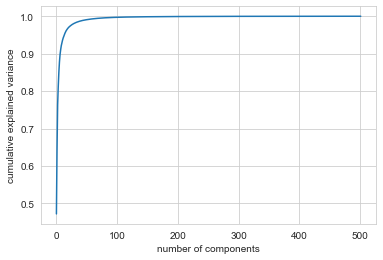

In [7]:
sns.set_style('whitegrid')
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Here we see that we'd need about 100 components to retain 100% of the variance. Looking at this plot for a high-dimensional dataset can help us understand the level of redundancy present in multiple observations

#### Apply PCA to reduce the number of dimensions from 502 to 2 dimensions for better data visualization.

In [8]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
print('explained variance :')
print('--------------------------------------------------------------------')
print(pca.explained_variance_)
print('--------------------------------------------------------------------')
print('PCA Components : ')
print('--------------------------------------------------------------------')
print(pca.components_)
print('--------------------------------------------------------------------')
X_transformed = pca.transform(X_scaled)
print('Transformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_transformed[:5,:])
print('--------------------------------------------------------------------')
print('Transformed Feature shape :')
print('--------------------------------------------------------------------')
print(X_transformed.shape)
print('--------------------------------------------------------------------')
print('Original Feature shape :')
print('--------------------------------------------------------------------')
print(X_scaled.shape)
print('--------------------------------------------------------------------')
print('Restransformed Feature shape :')
print('--------------------------------------------------------------------')
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)
print('--------------------------------------------------------------------')
print('Retransformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_retransformed[:5,:])
print('--------------------------------------------------------------------')

explained variance :
--------------------------------------------------------------------
[237.01475857  86.20695296]
--------------------------------------------------------------------
PCA Components : 
--------------------------------------------------------------------
[[-0.0641156  -0.06100625 -0.03912755 ... -0.06222908  0.00249839
  -0.05149673]
 [ 0.01345954 -0.01783581 -0.06428133 ... -0.02036739 -0.08124665
  -0.05945237]]
--------------------------------------------------------------------
Transformed Feature values first five rows :
--------------------------------------------------------------------
[[25.64715405  9.99154156]
 [25.74447983  9.87809253]
 [25.66169481  9.81134664]
 [25.76412613  9.97993834]
 [25.67551977  9.86346559]]
--------------------------------------------------------------------
Transformed Feature shape :
--------------------------------------------------------------------
(41266, 2)
-------------------------------------------------------------------

#### Problem 1:¶
 There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

#### Finding optimum number of clusters for KMEANS cluster

In [9]:
X_transformed.shape

(41266, 2)

In [11]:
!pip install scikit-plot

#### Elbow method 

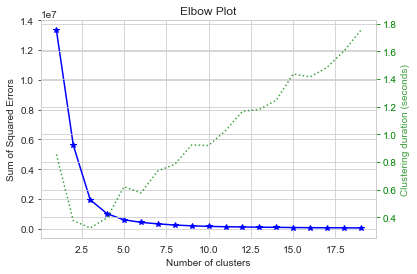

In [12]:
import scikitplot
scikitplot.cluster.plot_elbow_curve(KMeans(),X_transformed,cluster_ranges=range(1,20))

Optimum number of cluster from the elbow method is determined to be 5

#### Applying K-Means Clustering to find stocks which are similar in performance

In [15]:
X_train = pd.DataFrame(X_transformed)
X_train.rename(columns = {0:"Stock-1", 1:"Stock-2"})

,Stock-1,Stock-2
0,25.647154,9.991542
1,25.744480,9.878093
2,25.661695,9.811347
3,25.764126,9.979938
4,25.675520,9.863466
...,...,...
41261,-22.879373,13.327705
41262,-22.908026,13.315272
41263,-22.858756,13.338018
41264,-22.705779,13.428202


#### Kmean Algorithm

In [24]:
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_train)
y_kmeans = k_means.fit_predict(X_train)
labels = k_means.labels_

In [25]:
len(labels), X_train.shape

(41266, (41266, 2))

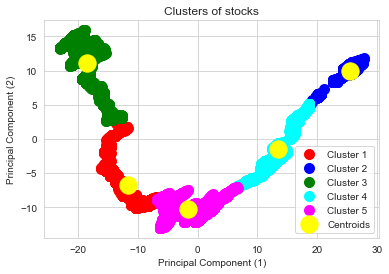

In [26]:
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

The above 5 clusters shows the stocks which are similar in stock performance

In [27]:
import pickle

filename = 'final_model_Kmean_clustring.pkl'
pickle.dump(k_means, open(filename, 'wb'))